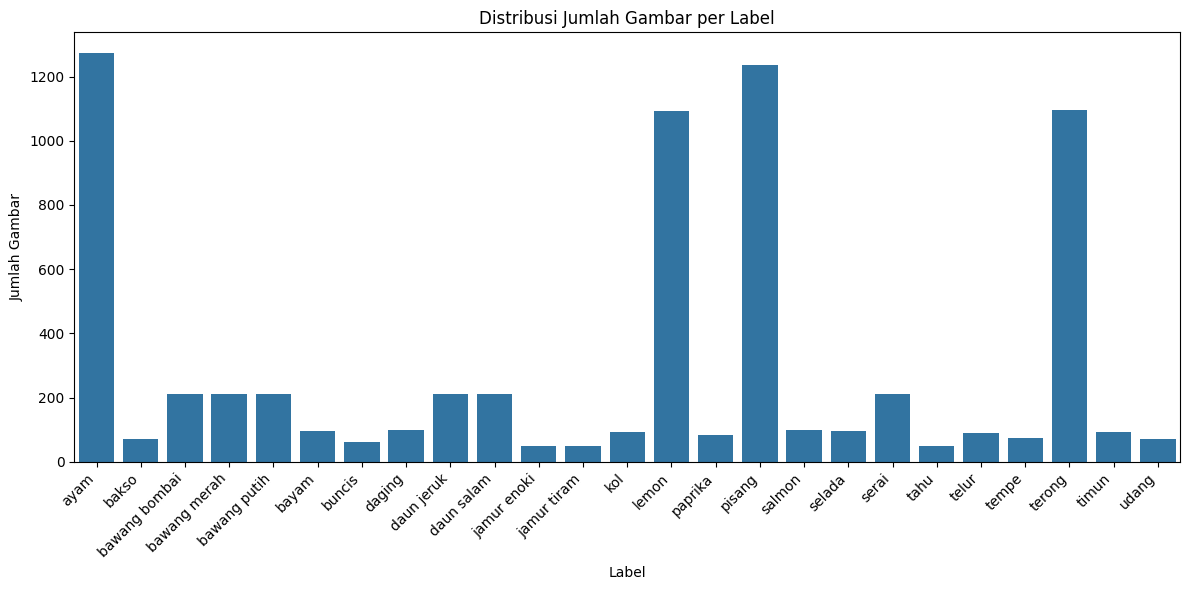

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

dataset_root = "dataset-bahan"  # ganti dengan path ekstraksi ZIP
label_dirs = [d for d in os.listdir(dataset_root) if os.path.isdir(os.path.join(dataset_root, d))]
label_counts = {label: len(os.listdir(os.path.join(dataset_root, label))) for label in label_dirs}

plt.figure(figsize=(12, 6))
sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()))
plt.xticks(rotation=45, ha='right')
plt.title("Distribusi Jumlah Gambar per Label")
plt.xlabel("Label")
plt.ylabel("Jumlah Gambar")
plt.tight_layout()
plt.show()

In [2]:
import os

# Path folder dataset asli
dataset_path = "dataset-bahan"
augmented_output_path = "augmented-dataset"
os.makedirs(augmented_output_path, exist_ok=True)

# Tentukan batas minimum yang diinginkan (contoh: median)
label_counts = {label: len(os.listdir(os.path.join(dataset_path, label))) for label in os.listdir(dataset_path)}
threshold = 500  # bisa disesuaikan

minor_labels = [label for label, count in label_counts.items() if count < threshold]
print("Labels yang akan diaugmentasi:", minor_labels)


Labels yang akan diaugmentasi: ['bakso', 'bawang bombai', 'bawang merah', 'bawang putih', 'bayam', 'buncis', 'daging', 'daun jeruk', 'daun salam', 'jamur enoki', 'jamur tiram', 'kol', 'paprika', 'salmon', 'selada', 'serai', 'tahu', 'telur', 'tempe', 'timun', 'udang']


In [3]:
from PIL import Image
from torchvision import transforms
import random

# Transformasi augmentasi
augment_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.RandomResizedCrop((224, 224), scale=(0.8, 1.0)),
])

def augment_image(image):
    return augment_transform(image)

In [4]:
from tqdm import tqdm
from PIL import UnidentifiedImageError
import shutil

for label in tqdm(minor_labels):
    label_path = os.path.join(dataset_path, label)
    save_path = os.path.join(augmented_output_path, label)
    os.makedirs(save_path, exist_ok=True)

    images = os.listdir(label_path)
    current_count = len(images)
    needed = threshold - current_count
    augment_rounds = needed // current_count + 1  # berapa kali keliling daftar

    # Lakukan augmentasi acak dari citra yang ada
    for i in range(augment_rounds):
        for img_name in images:
            if needed <= 0:
                break
            img_path = os.path.join(label_path, img_name)
            try:
                image = Image.open(img_path).convert("RGB")
            except UnidentifiedImageError:
                print(f"Skipping unreadable file: {img_path}")
                continue
            augmented = augment_image(image)
            new_name = f"aug_{i}_{img_name}"
            augmented.save(os.path.join(save_path, new_name))
            needed -= 1

    # Salin juga gambar asli
    for img_name in images:
        img_path = os.path.join(label_path, img_name)
        shutil.copy(img_path, os.path.join(save_path, img_name))

  5%|▍         | 1/21 [00:26<08:56, 26.83s/it]c:\Kuliah\DBS\Capstone\machine-learning\.venv\lib\site-packages\PIL\Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
 24%|██▍       | 5/21 [03:48<13:33, 50.87s/it]c:\Kuliah\DBS\Capstone\machine-learning\.venv\lib\site-packages\PIL\Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


Skipping unreadable file: dataset-bahan\buncis\green-bean-top-view_957803-2701.avif
Skipping unreadable file: dataset-bahan\buncis\green-beans-closeup-view_118047-13824.avif
Skipping unreadable file: dataset-bahan\buncis\green-beans-closeup-view_118047-14376.avif
Skipping unreadable file: dataset-bahan\buncis\pilha-de-feijao-verde-em-uma-banca-de-mercado_633872-1138.avif
Skipping unreadable file: dataset-bahan\buncis\green-bean-top-view_957803-2701.avif
Skipping unreadable file: dataset-bahan\buncis\green-beans-closeup-view_118047-13824.avif
Skipping unreadable file: dataset-bahan\buncis\green-beans-closeup-view_118047-14376.avif
Skipping unreadable file: dataset-bahan\buncis\pilha-de-feijao-verde-em-uma-banca-de-mercado_633872-1138.avif
Skipping unreadable file: dataset-bahan\buncis\green-bean-top-view_957803-2701.avif
Skipping unreadable file: dataset-bahan\buncis\green-beans-closeup-view_118047-13824.avif
Skipping unreadable file: dataset-bahan\buncis\green-beans-closeup-view_118047

 43%|████▎     | 9/21 [05:19<05:50, 29.21s/it]

Skipping unreadable file: dataset-bahan\jamur enoki\flammulina-filiformis-is-species-agaric-family-physalacriaceae-enokitake-mushroom-enoki_717054-1042.avif
Skipping unreadable file: dataset-bahan\jamur enoki\flammulina-filiformis-is-species-agaric-family-physalacriaceae-enokitake-mushroom-enoki_717054-1042.avif
Skipping unreadable file: dataset-bahan\jamur enoki\flammulina-filiformis-is-species-agaric-family-physalacriaceae-enokitake-mushroom-enoki_717054-1042.avif
Skipping unreadable file: dataset-bahan\jamur enoki\flammulina-filiformis-is-species-agaric-family-physalacriaceae-enokitake-mushroom-enoki_717054-1042.avif
Skipping unreadable file: dataset-bahan\jamur enoki\flammulina-filiformis-is-species-agaric-family-physalacriaceae-enokitake-mushroom-enoki_717054-1042.avif
Skipping unreadable file: dataset-bahan\jamur enoki\flammulina-filiformis-is-species-agaric-family-physalacriaceae-enokitake-mushroom-enoki_717054-1042.avif
Skipping unreadable file: dataset-bahan\jamur enoki\flammu

 48%|████▊     | 10/21 [05:44<05:04, 27.73s/it]

Skipping unreadable file: dataset-bahan\jamur tiram\jamur-tiram-oyster-mushrooms_685424-11.avif
Skipping unreadable file: dataset-bahan\jamur tiram\jamur-tiram-oyster-mushrooms_685424-11.avif
Skipping unreadable file: dataset-bahan\jamur tiram\jamur-tiram-oyster-mushrooms_685424-11.avif
Skipping unreadable file: dataset-bahan\jamur tiram\jamur-tiram-oyster-mushrooms_685424-11.avif
Skipping unreadable file: dataset-bahan\jamur tiram\jamur-tiram-oyster-mushrooms_685424-11.avif
Skipping unreadable file: dataset-bahan\jamur tiram\jamur-tiram-oyster-mushrooms_685424-11.avif
Skipping unreadable file: dataset-bahan\jamur tiram\jamur-tiram-oyster-mushrooms_685424-11.avif
Skipping unreadable file: dataset-bahan\jamur tiram\jamur-tiram-oyster-mushrooms_685424-11.avif
Skipping unreadable file: dataset-bahan\jamur tiram\jamur-tiram-oyster-mushrooms_685424-11.avif


 81%|████████  | 17/21 [11:03<03:01, 45.27s/it]

Skipping unreadable file: dataset-bahan\telur\TB2C0pXnDlYBeNjSszcXXbwhFXa_!!668081813.avif
Skipping unreadable file: dataset-bahan\telur\TB2C0pXnDlYBeNjSszcXXbwhFXa_!!668081813.avif
Skipping unreadable file: dataset-bahan\telur\TB2C0pXnDlYBeNjSszcXXbwhFXa_!!668081813.avif
Skipping unreadable file: dataset-bahan\telur\TB2C0pXnDlYBeNjSszcXXbwhFXa_!!668081813.avif


 95%|█████████▌| 20/21 [12:56<00:45, 45.63s/it]

Skipping unreadable file: dataset-bahan\udang\feature.avif
Skipping unreadable file: dataset-bahan\udang\fresh-raw-shrimp-seafood-ingredient-cooking_99974-925.avif
Skipping unreadable file: dataset-bahan\udang\feature.avif
Skipping unreadable file: dataset-bahan\udang\fresh-raw-shrimp-seafood-ingredient-cooking_99974-925.avif
Skipping unreadable file: dataset-bahan\udang\feature.avif
Skipping unreadable file: dataset-bahan\udang\fresh-raw-shrimp-seafood-ingredient-cooking_99974-925.avif
Skipping unreadable file: dataset-bahan\udang\feature.avif
Skipping unreadable file: dataset-bahan\udang\fresh-raw-shrimp-seafood-ingredient-cooking_99974-925.avif
Skipping unreadable file: dataset-bahan\udang\feature.avif
Skipping unreadable file: dataset-bahan\udang\fresh-raw-shrimp-seafood-ingredient-cooking_99974-925.avif
Skipping unreadable file: dataset-bahan\udang\feature.avif
Skipping unreadable file: dataset-bahan\udang\fresh-raw-shrimp-seafood-ingredient-cooking_99974-925.avif


100%|██████████| 21/21 [13:47<00:00, 39.39s/it]


In [5]:
from sklearn.model_selection import train_test_split
import shutil

def split_dataset(dataset_path, output_path, train_size=0.8):
    if os.path.exists(output_path):
        shutil.rmtree(output_path)
    os.makedirs(os.path.join(output_path, 'train'))
    os.makedirs(os.path.join(output_path, 'val'))

    for label in os.listdir(dataset_path):
        files = os.listdir(os.path.join(dataset_path, label))
        train_files, val_files = train_test_split(files, train_size=train_size, random_state=42)

        os.makedirs(os.path.join(output_path, 'train', label))
        os.makedirs(os.path.join(output_path, 'val', label))

        for f in train_files:
            shutil.copy(os.path.join(dataset_path, label, f), os.path.join(output_path, 'train', label, f))
        for f in val_files:
            shutil.copy(os.path.join(dataset_path, label, f), os.path.join(output_path, 'val', label, f))


In [7]:
split_dataset('augmented-dataset', 'augmented-dataset-split', train_size=0.8)

In [8]:
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

# Transformasi untuk data training (augmentasi)
transform_aug = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.RandomResizedCrop((224, 224), scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # jika pakai pretrained model
])

# Transformasi untuk data validasi (tanpa augmentasi)
transform_base = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [10]:
from torchvision import datasets

# Load dataset
train_dataset = datasets.ImageFolder('augmented-dataset-split/train', transform=transform_aug)
val_dataset = datasets.ImageFolder('augmented-dataset-split/val', transform=transform_base)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [11]:
import torch
import torch.nn as nn
from torchvision.models import shufflenet_v2_x1_0

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = shufflenet_v2_x1_0(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, len(train_dataset.classes))
model = model.to(device)


c:\Kuliah\DBS\Capstone\machine-learning\.venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Kuliah\DBS\Capstone\machine-learning\.venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ShuffleNet_V2_X1_0_Weights.IMAGENET1K_V1`. You can also use `weights=ShuffleNet_V2_X1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/shufflenetv2_x1-5666bf0f80.pth" to C:\Users\danny/.cache\torch\hub\checkpoints\shufflenetv2_x1-5666bf0f80.pth


100%|██████████| 8.79M/8.79M [00:03<00:00, 2.63MB/s]


In [12]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [13]:
from torch.utils.data import DataLoader
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import time
import copy

num_epochs = 10
best_model_wts = copy.deepcopy(model.state_dict())
best_acc = 0.0

train_losses, val_losses = [], []

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    print("-" * 10)

    # Training phase
    model.train()
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = running_corrects.double() / len(train_dataset)
    train_losses.append(epoch_loss)

    print(f"Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_corrects = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            val_corrects += torch.sum(preds == labels.data)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    epoch_val_loss = val_loss / len(val_dataset)
    epoch_val_acc = val_corrects.double() / len(val_dataset)
    val_losses.append(epoch_val_loss)

    print(f"Val Loss: {epoch_val_loss:.4f} Acc: {epoch_val_acc:.4f}")

    # Save best model
    if epoch_val_acc > best_acc:
        best_acc = epoch_val_acc
        best_model_wts = copy.deepcopy(model.state_dict())

print("Training complete.")
model.load_state_dict(best_model_wts)
torch.save(model.state_dict(), "best_model.pth")


Epoch 1/10
----------


c:\Kuliah\DBS\Capstone\machine-learning\.venv\lib\site-packages\PIL\Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.9391 Acc: 0.7740
Val Loss: 0.1361 Acc: 0.9628
Epoch 2/10
----------
Train Loss: 0.2136 Acc: 0.9331
Val Loss: 0.0859 Acc: 0.9714
Epoch 3/10
----------
Train Loss: 0.1229 Acc: 0.9621
Val Loss: 0.0790 Acc: 0.9723
Epoch 4/10
----------
Train Loss: 0.0907 Acc: 0.9712
Val Loss: 0.0452 Acc: 0.9890
Epoch 5/10
----------
Train Loss: 0.0846 Acc: 0.9703
Val Loss: 0.0305 Acc: 0.9895
Epoch 6/10
----------
Train Loss: 0.0631 Acc: 0.9799
Val Loss: 0.0396 Acc: 0.9871
Epoch 7/10
----------
Train Loss: 0.0470 Acc: 0.9863
Val Loss: 0.0185 Acc: 0.9943
Epoch 8/10
----------
Train Loss: 0.0726 Acc: 0.9786
Val Loss: 0.0452 Acc: 0.9823
Epoch 9/10
----------
Train Loss: 0.0659 Acc: 0.9793
Val Loss: 0.0194 Acc: 0.9938
Epoch 10/10
----------
Train Loss: 0.0499 Acc: 0.9836
Val Loss: 0.0184 Acc: 0.9943
Training complete.


Classification Report:
               precision    recall  f1-score   support

        bakso       1.00      1.00      1.00       100
bawang bombai       1.00      0.99      0.99       100
 bawang merah       1.00      1.00      1.00       100
 bawang putih       0.98      0.98      0.98       100
        bayam       1.00      1.00      1.00       100
       buncis       0.98      1.00      0.99        95
       daging       1.00      1.00      1.00       100
   daun jeruk       0.98      0.96      0.97       100
   daun salam       0.97      0.98      0.98       100
  jamur enoki       0.99      1.00      1.00       100
  jamur tiram       1.00      1.00      1.00       100
          kol       1.00      1.00      1.00       100
      paprika       1.00      1.00      1.00       100
       salmon       1.00      1.00      1.00       100
       selada       0.99      1.00      1.00       100
        serai       1.00      0.97      0.98       100
         tahu       1.00      1.00      1

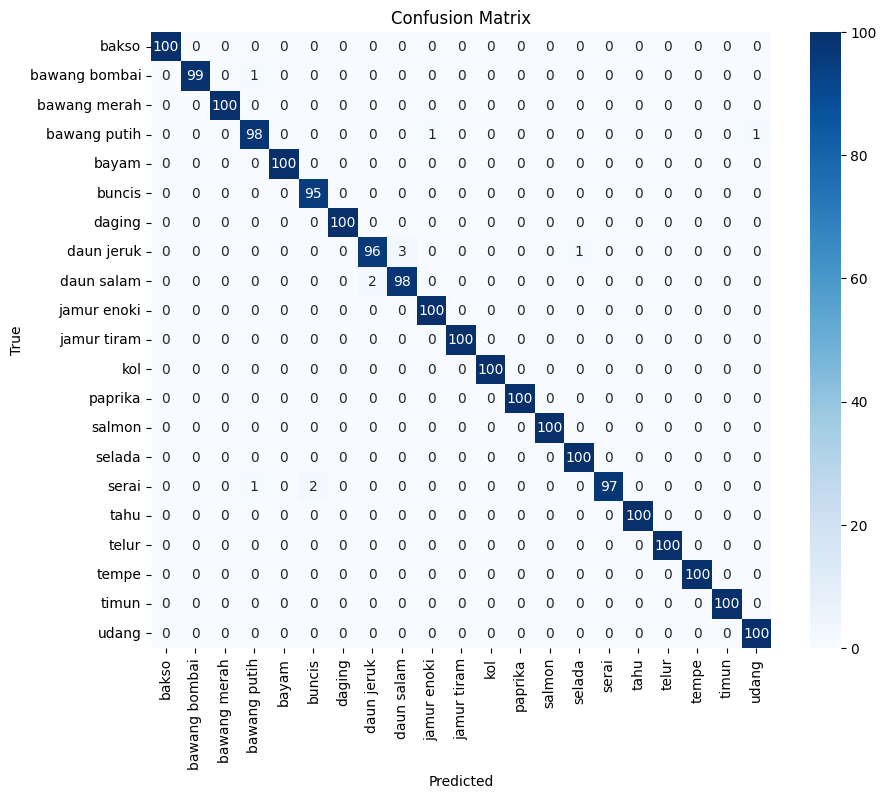

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prediksi pada data validasi
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Classification report
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=train_dataset.classes))

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=train_dataset.classes, yticklabels=train_dataset.classes, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [15]:
import json

with open("class_indices.json", "w") as f:
    json.dump(train_dataset.class_to_idx, f)


In [16]:
from PIL import Image
import torchvision.transforms as transforms

# Transformasi untuk inference (harus sama dengan validasi)
inference_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

def predict_image(image_path, model, class_names):
    # Load dan transformasi gambar
    image = Image.open(image_path).convert("RGB")
    image = inference_transform(image).unsqueeze(0).to(device)  # Tambahkan batch dimension

    # Set model ke eval mode
    model.eval()
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)
    
    # Ambil label prediksi
    predicted_label = class_names[predicted.item()]
    return predicted_label

In [ ]:
# Load model dan weight terbaik
model.load_state_dict(torch.load("best_model.pth"))
model = model.to(device)
model.eval()

# Contoh pemakaian fungsi
image_path = "predict_image.jpg"  # Ganti dengan path gambar yang ingin diuji
predicted_label = predict_image(image_path, model, train_dataset.classes)

print(f"Predicted Label: {predicted_label}")

Predicted Label: bawang putih


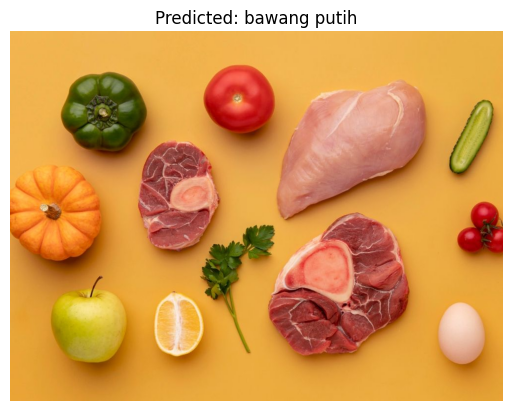

In [18]:
import matplotlib.pyplot as plt

def show_prediction(image_path, predicted_label):
    image = Image.open(image_path).convert("RGB")
    plt.imshow(image)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

# Contoh
show_prediction(image_path, predicted_label)
